In [9]:
import pandas as pd

In [143]:
def hashtag_webscrape(hashtag:str,language:str,df_name:str,limit=100000,clean=True, auto_update= True):
    import twint
    import pandas as pd
    import nest_asyncio
    
    nest_asyncio.apply()
    c = twint.Config()
    c.Search = hashtag
    c.Limit = limit
    c.Hide_output = True
    c.Pandas = True
    c.Pandas_clean = clean
    c.Pandas_au = auto_update
    
    twint.run.Search(c)
    
    tweets = twint.storage.panda.Tweets_df
    

    df = tweets[tweets.language == language]
    df.reset_index(inplace=True,drop=True)
    df = df[["tweet","hashtags"]]
    

    print("Finished: Successfully collected "+str(df.shape[0]) +" Tweets.")
    
    

In [93]:
hashtag_webscrape("#women","en", limit=1)

Finished: Successfully collected 73 Tweets.


In [144]:
df

,tweet,hashtags
0,Sharon’s Shorts $9.99 10 short stories to read...,"[romance, fantasy, suspense, women, fable, par..."
1,Be yourself in a world where everyone wants to...,"[betruetoyourself, love, women]"
2,#Women empowerment,[women]
3,Educating themselves in their own way - how do...,"[organize, selfhelp, empower, women]"
4,#Women folx aren't naturally jealous or hatefu...,[women]
...,...,...
68,#Women Titanium Steel Wide Face Ring Faux Diam...,[women]
69,PTSD Linked to Opioid Misuse in HIV-Positive P...,[women]
70,"Imogen Low, Co-Founder &amp; CTO https://t....","[bigdata, ai, linkedin, iiot, iot, tech, linux..."
71,We at #ERAMN love steaming hot #EQUALITY.Show ...,"[eramn, equality, women, constitution, eranow,..."


In [167]:
l=[1,5,3,6,6,2,4,8,4,2,7,4]

In [140]:
def unique_list(l):
    a=l
    b=list(pd.unique(l))
    for i in b:
        a.remove(i)
    return("The duplicate items in the list are: " + str(list(pd.unique(a))))
        

In [141]:
unique_list(l)

'The duplicate items in the list are: [6, 4, 2]'

In [211]:
df.reset_index(drop=True,inplace=True)

<AxesSubplot:xlabel='0'>

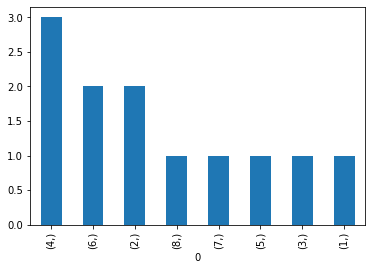

In [222]:
pd.DataFrame(l).value_counts().plot(kind="bar")